# **LOADING OF DATA**

link of data : https://www.kaggle.com/puneet6060/intel-image-classification/download

In [0]:
import tensorflow
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pickle
import urllib
from PIL import Image


Function to load images and their label

In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'buildings': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(50,50)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
    
    return labels[class_code]

Get the train dataset

In [0]:
xtrain, ytrain = get_images('/content/drive/My Drive/Programmation/Python/Udacity/seg_train/seg_train/')

Save the train data to CSV 

In [0]:
with open('ytrain', 'wb') as f:
  pickle.dump(ytrain, f)


with open('xtrain', 'wb') as f:
  pickle.dump(xtrain, f)

Get the test dataset

In [0]:
xtest, ytest = get_images('/content/drive/My Drive/Programmation/Python/Udacity/seg_test/seg_test/')

Save the test data to CSV 

In [0]:
with open('ytest', 'wb') as f:
  pickle.dump(ytest, f)

with open('xtest', 'wb') as f:
   pickle.dump(xtest, f)

# **DATA EXPLORATION**

Loading of training data

In [0]:
with open('ytrain', 'rb') as f:
  ytrain = pickle.load(f)

with open('xtrain', 'rb') as f:
  xtrain = pickle.load(f)

# Converting list to array

ytrain = np.array(ytrain)
xtrain = np.array(xtrain)

Loading of testing data

In [0]:
with open('ytest', 'rb') as f:
  ytest = pickle.load(f)

with open('xtest', 'rb') as f:
  xtest = pickle.load(f)

# Converting list to array

ytest = np.array(ytest)
xtest = np.array(xtest)

Shape of training data

In [0]:
print("Shape of images:",xtrain.shape)
print("Shape of labels:",ytrain.shape)

Shape of images: (14034, 50, 50, 3)
Shape of labels: (14034,)


Shape of test data

In [0]:
print("Shape of images:",xtest.shape)
print("Shape of labels:",ytest.shape)

Shape of images: (3000, 50, 50, 3)
Shape of labels: (3000,)


View of images

The resizing of image reduced the quality of image but that 
will make fast the process

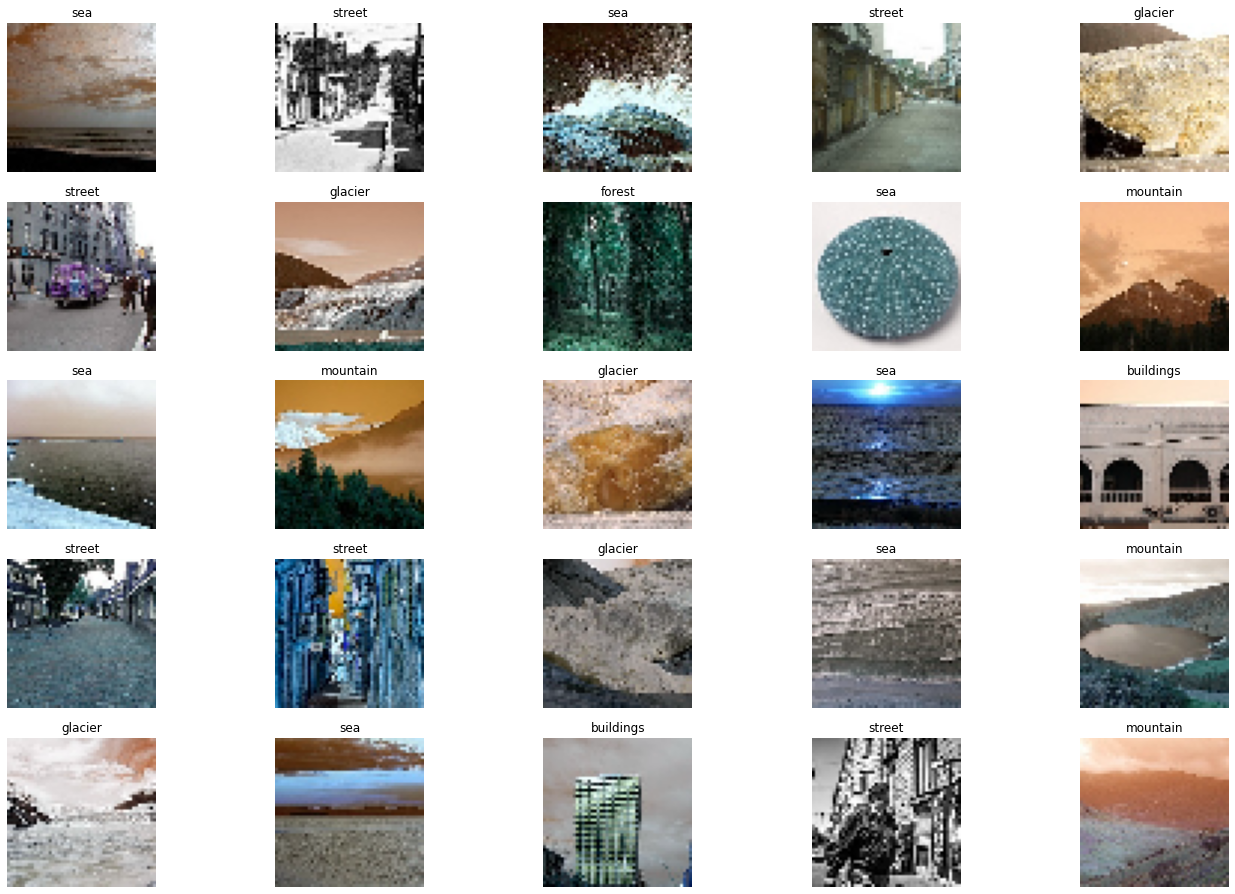

In [0]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(xtrain))
        ax[i,j].imshow(xtrain[rnd_number])
        ax[i,j].set_title(get_classlabel(ytrain[rnd_number]))
        ax[i,j].axis('off')

# **MODELING (CONVUTIONAL NEURAL NETWORK)**

In [0]:
tensorflow.random.set_seed(400)


model = Models.Sequential()

model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(45,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(40,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(30,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(25,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(25,activation='relu'))
model.add(Layers.Dense(25,activation='relu'))
model.add(Layers.Dense(20,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 48, 48, 50)        1400      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 46, 46, 50)        22550     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 50)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 21, 21, 45)        20295     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 19, 19, 40)        16240     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 17, 30)        10830     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 25)       

In [0]:
trained = model.fit(xtrain,ytrain,epochs=50,validation_split=0.30)

Epoch 1/50
307/307 [==============================] - 3s 8ms/step - loss: 1.9324 - accuracy: 0.1879 - val_loss: 1.6958 - val_accuracy: 0.2546
Epoch 2/50
307/307 [==============================] - 2s 8ms/step - loss: 1.7009 - accuracy: 0.2258 - val_loss: 1.5448 - val_accuracy: 0.3743
Epoch 3/50
307/307 [==============================] - 2s 8ms/step - loss: 1.5859 - accuracy: 0.3036 - val_loss: 1.4493 - val_accuracy: 0.3593
Epoch 4/50
307/307 [==============================] - 2s 8ms/step - loss: 1.5193 - accuracy: 0.3376 - val_loss: 1.3284 - val_accuracy: 0.4453
Epoch 5/50
307/307 [==============================] - 2s 8ms/step - loss: 1.4286 - accuracy: 0.3827 - val_loss: 1.2505 - val_accuracy: 0.4745
Epoch 6/50
307/307 [==============================] - 2s 8ms/step - loss: 1.3561 - accuracy: 0.4125 - val_loss: 1.2008 - val_accuracy: 0.5524
Epoch 7/50
307/307 [==============================] - 2s 8ms/step - loss: 1.3163 - accuracy: 0.4422 - val_loss: 1.2100 - val_accuracy: 0.5569
Epoch 

Applying of model on testing sample

In [0]:
model.evaluate(xtest,ytest, verbose=1)

94/94 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.7350


[1.190036654472351, 0.7350000143051147]

Saving of model

In [0]:
model.save("model.h5")

# **TESTS**

Loading of model

In [0]:
model = load_model('model.h5')

In [0]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [0]:
def scene_detector(url):
  # get the image in array format
  image_array = url_to_image(url)
  # get the image
  image = Image.fromarray(image_array)
  # resize the image to use it for the prediction
  resized_img = cv2.resize(image_array,(50,50))
  #reshape the array to apply it to the model
  reshape_array = tensorflow.reshape(resized_img,shape=(-1,50,50,3))
  # get the class 
  pred_class = model.predict_classes(reshape_array)[0]
  # get the class probability
  pred_prob = round(max(model.predict(reshape_array).reshape(6))*100,1)
  # labels
  labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
  # predicted label
  pred_label = labels[pred_class]
  print(pred_label + ': ' + str(pred_prob) + ' %')
  print()
  return image.resize((200, 200))


buildings: 99.3 %



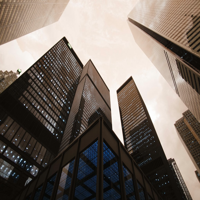

In [0]:
scene_detector('https://images.unsplash.com/photo-1486406146926-c627a92ad1ab?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80')

forest: 100.0 %



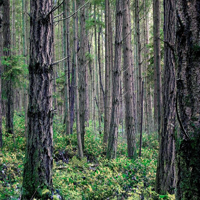

In [0]:
scene_detector('https://i.pinimg.com/originals/cf/fc/35/cffc3577faee244107745265862001ff.jpg')

sea: 76.3 %



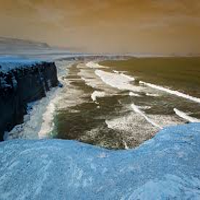

In [0]:
scene_detector('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSbQXZyZk3iYejPn4uoGSgU6gEvgv7WMlxWyJwg0_PQhNkFRonr&usqp=CAU')